# Analysis of agent-based model

Tsvetkova, M., Olsson, H., & Galesic, M. (2024). Social networks affect redistribution decisions and polarization. https://doi.org/10.31219/osf.io/bw7ux

In [5]:
import os, sys
import warnings
warnings.filterwarnings('ignore')

module_path = os.path.abspath(os.path.join('modules/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from read_netlogo_data import *
from plot import *

DATA1 = 'sim-data/high-ineq-table_1.csv' 
DATA2 = 'sim-data/high-ineq-table_2.csv' 

init_plot()


## Get the data

In [ ]:
# Simulation data were split in two files to reduce file size
df = pd.concat([get_sim_data(DATA1), get_sim_data(DATA2)], 
                ignore_index=True)

# To analyze network properties, initial inequality, and vote polarization
df_first = df[df['period']==1]

# To analyze inequality after voting
df_second = df[df['period']==2]

# Create new df of initial conditions where each row is agent
df_long = get_agent_data(df_first)
print(df_long.head())


   run    h    v  num_observers  log_num_observers  observed_mean_wealth  \
0    1 -1.0 -1.0             10           1.041393            107.404252   
1    1 -1.0 -1.0             12           1.113943             78.334900   
2    1 -1.0 -1.0              8           0.954243             91.830658   
3    1 -1.0 -1.0              6           0.845098             53.147802   
4    1 -1.0 -1.0              7           0.903090            162.231460   

   observed_gini  observed_subj_ineq      wealth     utility  vote  
0       0.377777            0.970209   16.782209  -76.223192    99  
1       0.745673            1.411446  127.381144  110.078394    15  
2       0.342682            0.986773   10.168242  -30.662966    96  
3       0.373033            2.353516  222.524220  180.180115     8  
4       0.325533            1.091003    4.372579 -153.486303    96  


## Assortativity by wealth

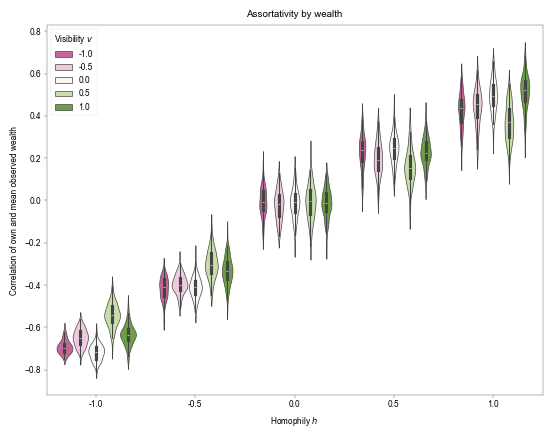

In [7]:
# Check that h works as intended and v does not affect assortativity
plot_assortativity(df_first)

# Parameter h seems to work as inteded and v only slightly modifies assortativity
# This plot hides NON-LINEARITY and NON-MONOTONICITY however

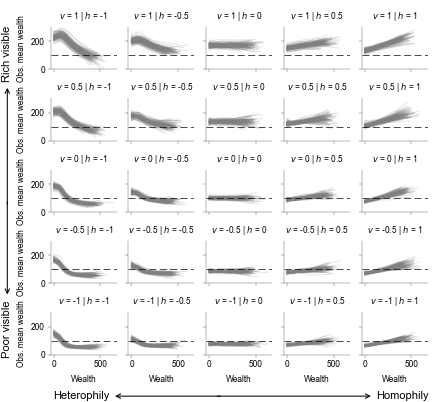

In [8]:
# This is a more detailed version of the above plot:
# Fit Lowess line to own wealth vs. other wealth for each run
# Set baseline at 100, which is the mean wealth as set in the model
# These take too much time so comment out if necessary
plot_lowess_fits(df_long, x='wealth', y='observed_mean_wealth', 
                 ylim=(0, 300), xlabel='Wealth', ylabel='Obs. mean wealth',
                 baseline=100, save='plots/figS1.pdf')

In [9]:
# This is a more detailed version of the above plot:
# Fit Lowess line to own wealth vs. other wealth for each run
# Set baseline at 100, which is the mean wealth as set in the model
# These take too much time so comment out if necessary
"""plot_lowess_fits(df_long, x='wealth', y='observed_subj_ineq', 
                 ylim=(0, 6), xlabel='Wealth', ylabel='Obs. subj. inequality',
                 baseline=None)"""

"plot_lowess_fits(df_long, x='wealth', y='observed_subj_ineq', \n                 ylim=(0, 6), xlabel='Wealth', ylabel='Obs. subj. inequality',\n                 baseline=None)"

## Visibility by wealth

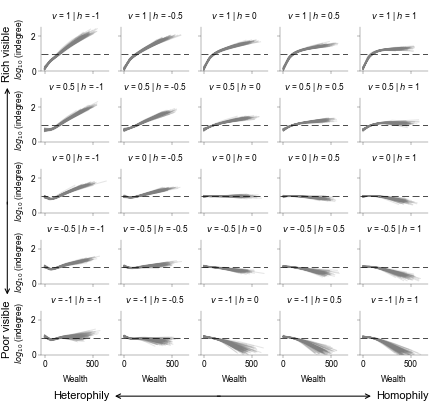

In [10]:
# Fit Lowess line to own wealth vs. number of observers for each run
plot_lowess_fits(df_long, x='wealth', y='log_num_observers', 
                 ylim=(0, 2.5), xlabel='Wealth', ylabel=r'$log_{10}$ (indegree)',
                 baseline=np.log10(8+1),  # We add 1 to indegree to be able to calculate log(0)
                 save='plots/figS2.pdf')

## Perceived inequality by wealth

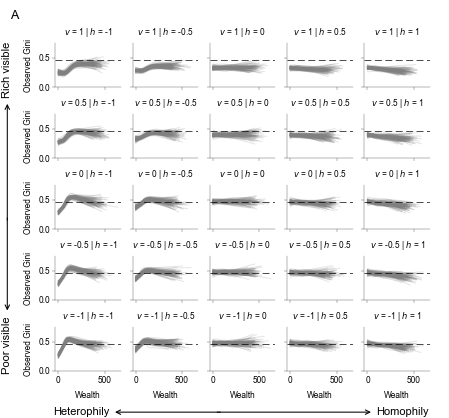

In [11]:
# Fit Lowess line to own wealth vs. observed Gini for each run
# Add initial population Gini for reference
plot_lowess_fits(df_long, x='wealth', y='observed_gini', 
                 ylim=(0, 0.75), xlabel='Wealth', ylabel='Observed Gini',
                 baseline=np.mean(df_first['gini'].values),
                 subfig_letter=True, save='plots/fig1_1.pdf')

## Outcomes

### Voted tax rate and resultant inequality

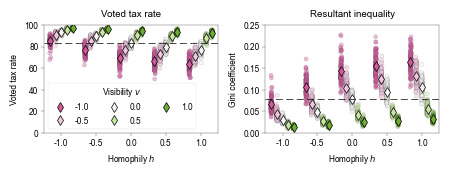

In [12]:
# Distribution plot of median vote in median round and resultant inequality in second round

vote_repr = np.mean( df_first[(df_first['h']==0) & (df_first['v']==0)]['median_vote'].values )
gini_repr = np.mean( df_second[(df_second['h']==0) & (df_second['v']==0)]['gini'].values )

plot2_y_hv(data1=df_first, y1='median_vote', title1='Voted tax rate', ylim1=(0, 100), 
           data2=df_second, y2='gini', title2='Resultant inequality', ylim2=(0,0.25), 
               baseline1=vote_repr, baseline2=gini_repr)

### Vote polarization

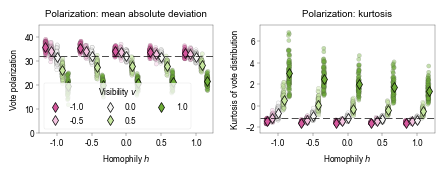

In [13]:
# Distribution plot of vote variance and kurtosis in first period
var_repr = np.mean( df_first[(df_first['h']==0) & (df_first['v']==0)]['vote_var'].values )
mad_repr = np.mean( df_first[(df_first['h']==0) & (df_first['v']==0)]['vote_mad'].values )
kurt_repr = np.mean( df_first[(df_first['h']==0) & (df_first['v']==0)]['vote_kurt'].values )

plot2_y_hv(data1=df_first, y1='vote_mad', title1='Polarization: mean absolute deviation', ylim1=(0, 45), 
           data2=df_first, y2='vote_kurt', title2='Polarization: kurtosis', ylim2=(-2.5, 7.5), 
               baseline1=mad_repr, baseline2=kurt_repr)

### Combined visualization

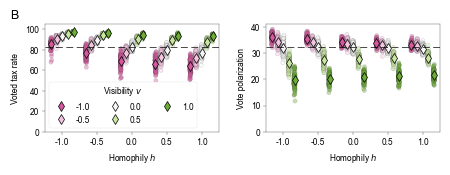

In [14]:
plot2_y_hv(data1=df_first, y1='median_vote', title1=None, ylim1=(0, 105), 
           data2=df_first, y2='vote_mad', title2=None, ylim2=(0, 41), 
           baseline1=vote_repr, baseline2=mad_repr, 
           subfig_letter=True, save='plots/fig1_2.pdf')